Troy Morgan  
Week 9 Independent Lab  
BGEN 632, Graduate Introduction to Python  
Submitted 

Independent Lab: Inferential Statistics

# Notebook Setup

In [2]:
# load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

In [3]:
# Set working directory
os.chdir("\\Users\\troy.morgan\\Documents\\GitHub\\week9labs/data")  # change this to your filepath
os.getcwd()  # confirm change

'C:\\Users\\troy.morgan\\Documents\\GitHub\\week9labs\\data'

In [4]:
# Load California hospital data and do a quick inspection. 
ect_data = pd.read_table("ect_data.txt", delimiter='\t')
ect_data

,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
0,6,6,6,6,6,6,6,6,6,4,5,5,5,5,5,5
1,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6
2,6,6,6,6,7,7,7,7,6,5,5,5,5,5,5,5
3,7,7,7,7,6,6,7,6,5,5,5,5,7,6,7,6
4,7,7,6,6,7,7,7,6,6,6,7,7,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,6,6,6,7,7,6,7,6,6,5,5,5,6,6,6,5
197,5,6,6,6,7,7,7,7,7,7,6,6,6,4,4,6
198,6,5,6,6,5,6,6,5,6,5,6,5,5,5,6,5
199,6,6,6,6,6,7,6,6,6,6,7,7,5,5,6,5


# Linear and Multiple Regression

Using `intent1_01` as the target variable, create a regression model using only 5 of the other numerical variables.
Do not include `intent1_02`, `intent1_03`, and `intent1_04` as independent variables.

I will use attitude1_01, attitude1_02, attitude1_03, attitude1_04, and satis01. 

Are these likert scale answers on a survey?

## Assess the validity of the assumptions of linearity...

<Axes: xlabel='attitude1_01', ylabel='intent1_01'>

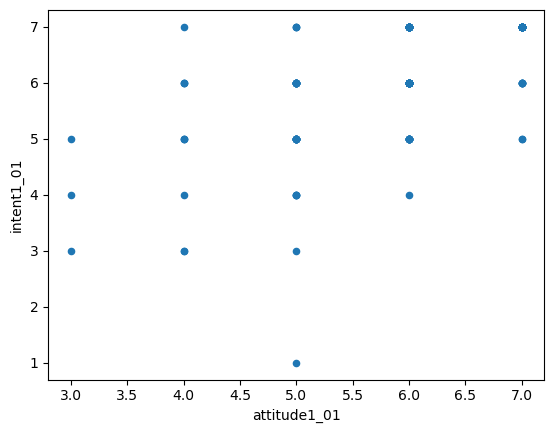

In [5]:
#Scatterplot with first variable.
ect_data.plot.scatter(x='attitude1_01', y='intent1_01')

<Axes: xlabel='attitude1_02', ylabel='intent1_01'>

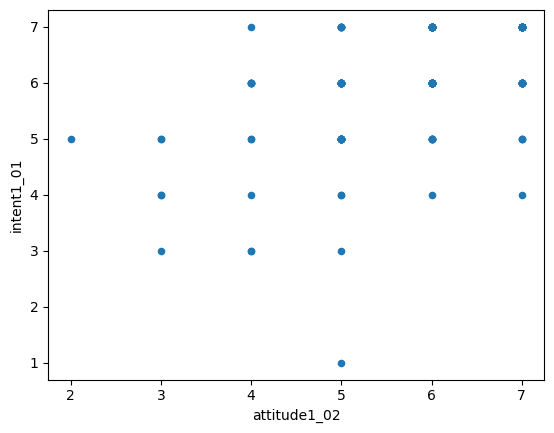

In [6]:
#Scatterplot with second variable.
ect_data.plot.scatter(x='attitude1_02', y='intent1_01')

<Axes: xlabel='attitude1_03', ylabel='intent1_01'>

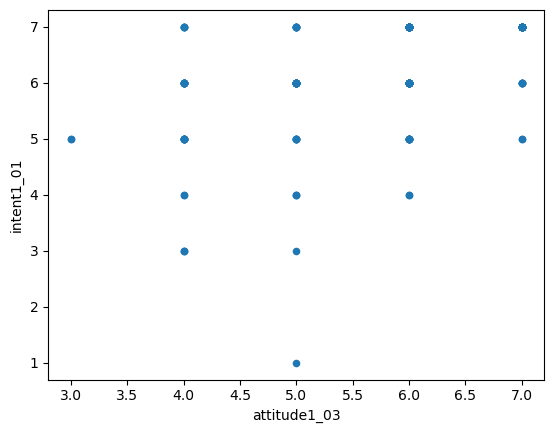

In [7]:
#Scatterplot with third variable.
ect_data.plot.scatter(x='attitude1_03', y='intent1_01')

<Axes: xlabel='attitude1_04', ylabel='intent1_01'>

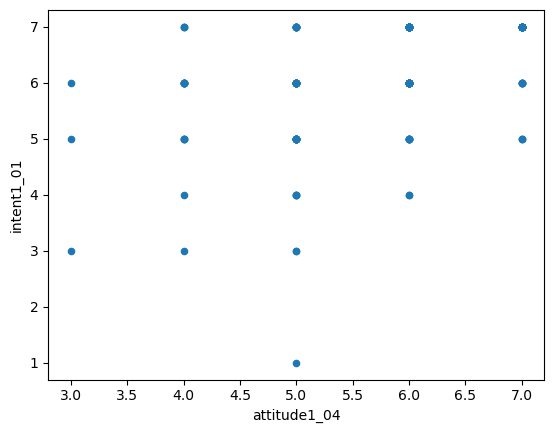

In [8]:
#Scatterplot with fourth variable.
ect_data.plot.scatter(x='attitude1_04', y='intent1_01')

<Axes: xlabel='satis01', ylabel='intent1_01'>

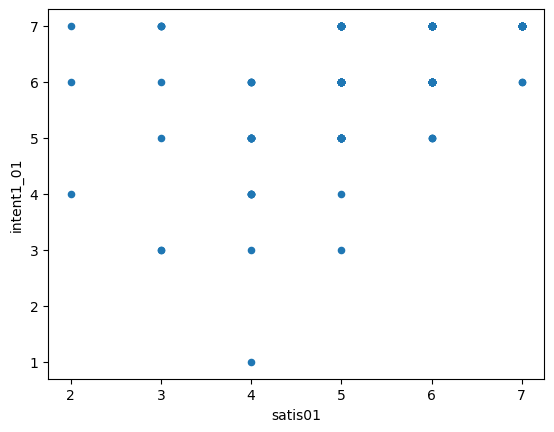

In [9]:
#Scatterplot with fifth variable.
ect_data.plot.scatter(x='satis01', y='intent1_01')

### Assessment of linearity

None of these look terribly linear to me, but maybe they are? I'm going to proceed on the assumption that they are so as to continue working on this assignment. 

## Assess the validity of the assumptions of collinearity...

In [14]:
# Use pearsonr() to calculate the correlation coefficient and pvalues for each independent variable against the target variable.
print(pearsonr(ect_data.attitude1_01, ect_data.intent1_01))
print(pearsonr(ect_data.attitude1_02, ect_data.intent1_01))
print(pearsonr(ect_data.attitude1_03, ect_data.intent1_01))
print(pearsonr(ect_data.attitude1_04, ect_data.intent1_01))
print(pearsonr(ect_data.satis01, ect_data.intent1_01))

PearsonRResult(statistic=0.6663562202246993, pvalue=3.6154224826027544e-27)
PearsonRResult(statistic=0.6036161039889795, pvalue=2.4408895712741707e-21)
PearsonRResult(statistic=0.519098567478697, pvalue=2.9068684515866345e-15)
PearsonRResult(statistic=0.5120316317108963, pvalue=7.907993696942252e-15)
PearsonRResult(statistic=0.545688440252472, pvalue=5.425059701904438e-17)


### Assessment of collinearity

I consulted ChatGPT for a plain language explanation of what these numbers mean (see reference). With that in mind, it seems there is a moderately strong correlation between each of our independent variables and the target variable. The p-values also indicate that these are highly statistically significant. 

Does the correlation coefficient also support the assumption of linearity?

## Assess the validity of the assumptions of homoscedasticity...

# References

This ChatGPT exchange was used to interpret the results of the Pearson test:

<div><center><img src = "Assets/pearsonR_ChatGPT.png"></center></div>

